<a href="https://colab.research.google.com/github/yohanesnuwara/machine-learning/blob/master/02_datapreproc/scale_data_for_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Scale Machine Learning Data**

In [1]:
!git clone https://github.com/yohanesnuwara/machine-learning

Cloning into 'machine-learning'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 65 (delta 24), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (65/65), done.


## Normalize data

Find minimum and maximum value of the data.

In [0]:
# Find the min and max values for each column
def dataset_minmax(dataset):
  minmax = list()
  for i in range(len(dataset[0])):
    col_values = [row[i] for row in dataset]
    value_min = min(col_values)
    value_max = max(col_values)
    minmax.append([value_min, value_max])
  return minmax

In [8]:
# Small dataset example (2 columns and 4 rows)
dataset = [[50, 30], [20, 90], [40, 10], [5, 10]]
# Calculate min and max for each column
minmax = dataset_minmax(dataset)
print(minmax)

[[5, 50], [10, 90]]


Normalize min to 0 and max to 1. Equation to normalize:

$$scaled value = \frac{value - min}{max - min}$$

In [0]:
# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
  for row in dataset:
    for i in range(len(row)):
      row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

In [10]:
# Normalize columns
normalize_dataset(dataset, minmax)
print(dataset)

[[1.0, 0.25], [0.3333333333333333, 1.0], [0.7777777777777778, 0.0], [0.0, 0.0]]


Load (using function library in folder `01_dataload`) and normalize `pima-indians-diabetes` dataset.

In [11]:
import os, sys
sys.path.append('/content/machine-learning/01_dataload')

from load_csv_data import *

# Load pima-indians-diabetes dataset
filename = '/content/machine-learning/datasets/pima-indians-diabetes.csv'
dataset = load_csv(filename)

# convert string columns to float
for i in range(len(dataset[0])):
  str_column_to_float(dataset, i)
print('Original dataset:', dataset[0])

# Calculate min and max for each column
minmax = dataset_minmax(dataset)
# Normalize columns
normalize_dataset(dataset, minmax)
print('Normalized dataset:', dataset[0])

Original dataset: [6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0, 1.0]
Normalized dataset: [0.35294117647058826, 0.7437185929648241, 0.5901639344262295, 0.35353535353535354, 0.0, 0.5007451564828614, 0.23441502988898377, 0.48333333333333334, 1.0]


## Standardize data

Centering the distribution of the data on the value 0 and the standard deviation to the value 1. Using mean and standard deviation to summarize a normal distribution. 

In [0]:
# Calculate mean
def mean(numbers):
  return sum(numbers)/float(len(numbers))

# Calculate column mean
def column_mean(dataset):
  mean_col = [(mean(column)) for column in zip(*dataset)]
  # del(mean_col[-1])
  return mean_col

# Calculate the standard deviation of a list of numbers
def stdev(numbers):
  from math import sqrt
  avg = mean(numbers)
  variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
  return sqrt(variance)

# Calculate column standard deviation
def column_stdev(dataset):
  stdev_col = [(stdev(column)) for column in zip(*dataset)]
  # del(stdev_col[-1])
  return stdev_col

Calculate `mean` and `standard deviation` of the simple dataset.

In [57]:
# simple dataset (2 columns and 3 rows)
dataset = [[50, 30], [20, 90], [30, 50]]
means = column_mean(dataset)
stdevs = column_stdev(dataset)
print('Mean of column 1:', means[0], 'and column 2:', means[1])
print('Standard deviation of column 1:', stdevs[0], 'and column 2:', stdevs[1])

Mean of column 1: 33.333333333333336 and column 2: 56.666666666666664
Standard deviation of column 1: 15.275252316519467 and column 2: 30.550504633038933


Standardize the dataset based on the equation:

$$standardizedvalue(i) = \frac{\sum_{i=1}^{n}(value(i) - mean)}{stdev}$$

In [0]:
# standardize dataset
def standardize_dataset(dataset, means, stdevs):
  for row in dataset:
    for i in range(len(row)):
      row[i] = (row[i] - means[i]) / stdevs[i]

In [59]:
# standardize dataset
standardize_dataset(dataset, means, stdevs)
print('Standardized dataset:', dataset)

Standardized dataset: [[1.0910894511799618, -0.8728715609439694], [-0.8728715609439697, 1.091089451179962], [-0.21821789023599253, -0.2182178902359923]]


Implement to `pima-indians-diabetes` dataset

In [60]:
# Load pima-indians-diabetes dataset
filename = '/content/machine-learning/datasets/pima-indians-diabetes.csv'
dataset = load_csv(filename)
print('Loaded data file {0} with {1} rows and {2} columns'.format(filename, len(dataset), len(dataset[0])))

# convert string columns to float
for i in range(len(dataset[0])):
  str_column_to_float(dataset, i)
print('Original dataset:', dataset[0])

# Estimate mean and standard deviation
means = column_mean(dataset)
stdevs = column_stdev(dataset)

# standardize dataset
standardize_dataset(dataset, means, stdevs)
print('Standardized dataset:', dataset[0])

Loaded data file /content/machine-learning/datasets/pima-indians-diabetes.csv with 768 rows and 9 columns
Original dataset: [6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0, 1.0]
Standardized dataset: [0.6395304921176576, 0.8477713205896718, 0.14954329852954296, 0.9066790623472505, -0.692439324724129, 0.2038799072674717, 0.468186870229798, 1.4250667195933604, 1.3650063669598067]


## Extension: Other data transform techniques

* Exponential transform (logarithm, exponents, square root)
* Power transforms e.g. Box-Cox to fix skew in normally distributed data

Review data distribution of `pima-indians-diabetes`

Data attributes/column:
0. Number of times pregnant.
1. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
2. Diastolic blood pressure (mm Hg).
3. Triceps skinfold thickness (mm).
4. 2-Hour serum insulin (mu U/ml).
5. Body mass index (weight in kg/(height in m)^2).
6. Diabetes pedigree function.
7. Age (years).
8. Class variable (0 or 1).

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


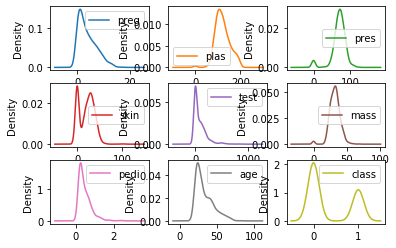

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load pima-indians-diabetes dataset
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
filename = '/content/machine-learning/datasets/pima-indians-diabetes.csv'
pima = pd.read_csv(filename, names=colnames, header=None)

pima.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
pima.head(10)

# sns.pairplot(pima)

Calculate skewness of data.

In [67]:
num_feats = pima.dtypes[pima.dtypes!='object'].index

# calculate skew and sort
skew_feats = pima[num_feats].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skew_feats})
skewness

,Skew
test,2.272251
pedi,1.919911
age,1.129597
preg,0.901674
class,0.635017
plas,0.173754
skin,0.109372
mass,-0.428982
pres,-1.843608


### Square Root Transformation

,preg,plas,pres,skin,test,mass,pedi,age,class
0,2.449490,12.165525,8.485281,5.916080,0.000000,5.796551,0.791833,7.071068,1.0
1,1.000000,9.219544,8.124038,5.385165,0.000000,5.157519,0.592453,5.567764,0.0
2,2.828427,13.527749,8.000000,0.000000,0.000000,4.827007,0.819756,5.656854,1.0
3,1.000000,9.433981,8.124038,4.795832,9.695360,5.300943,0.408656,4.582576,0.0
4,0.000000,11.704700,6.324555,5.916080,12.961481,6.565059,1.512614,5.744563,1.0
5,2.236068,10.770330,8.602325,0.000000,0.000000,5.059644,0.448330,5.477226,0.0
6,1.732051,8.831761,7.071068,5.656854,9.380832,5.567764,0.497996,5.099020,1.0
7,3.162278,10.723805,0.000000,0.000000,0.000000,5.941380,0.366060,5.385165,0.0
8,1.414214,14.035669,8.366600,6.708204,23.302360,5.522681,0.397492,7.280110,1.0
9,2.828427,11.180340,9.797959,0.000000,0.000000,0.000000,0.481664,7.348469,1.0


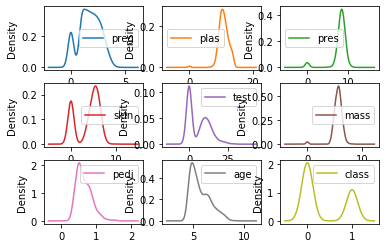

In [69]:
sqrt_pima = pima**(.5)
sqrt_pima.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
sqrt_pima.head(10)

### Reciprocal Transformation

Limitation: INVALID if data contains Zero or NaN

In [0]:
# still not successful, because data still contains 0. Should be cleansed first (see 01_loaddata notebook)

recip_pima = 1 / pima
recip_pima.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
recip_pima.head(10)

### Power Transformation

,preg,plas,pres,skin,test,mass,pedi,age,class
0,36,21904,5184,1225,0,1128.96,0.393129,2500,1
1,1,7225,4356,841,0,707.56,0.123201,961,0
2,64,33489,4096,0,0,542.89,0.451584,1024,1
3,1,7921,4356,529,8836,789.61,0.027889,441,0
4,0,18769,1600,1225,28224,1857.61,5.234944,1089,1
5,25,13456,5476,0,0,655.36,0.040401,900,0
6,9,6084,2500,1024,7744,961.00,0.061504,676,1
7,100,13225,0,0,0,1246.09,0.017956,841,0
8,4,38809,4900,2025,294849,930.25,0.024964,2809,1
9,64,15625,9216,0,0,0.00,0.053824,2916,1


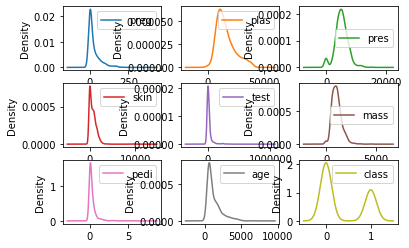

In [74]:
pow_pima = pima**2
pow_pima.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
pow_pima.head(10)

### Box-Cox Transformation




# Question:
1. Can data transformation more than twice?
2. Will data transformation change the essential meaning of data?
3. How to transform **binomial distributed** data?